In [14]:
# memanggil pustaka

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [15]:
# memuat dan membaca file .csv

df = pd.read_csv('Sample-Superstore.csv', encoding='windows-1252')
print(df.head())

   Row ID        Order ID  Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
1       2  CA-2016-152156   11/8/2016  11/11/2016    Second Class    CG-12520   
2       3  CA-2016-138688   6/12/2016   6/16/2016    Second Class    DV-13045   
3       4  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   
4       5  US-2015-108966  10/11/2015  10/18/2015  Standard Class    SO-20335   

     Customer Name    Segment        Country             City  ...  \
0      Claire Gute   Consumer  United States        Henderson  ...   
1      Claire Gute   Consumer  United States        Henderson  ...   
2  Darrin Van Huff  Corporate  United States      Los Angeles  ...   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale  ...   

  Postal Code  Region       Product ID         Category Sub-Category  \
0       42420   Sout

In [16]:
# informasi dan tipe data kolom
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Row ID         9994 non-null   int64  
 1   Order ID       9994 non-null   object 
 2   Order Date     9994 non-null   object 
 3   Ship Date      9994 non-null   object 
 4   Ship Mode      9994 non-null   object 
 5   Customer ID    9994 non-null   object 
 6   Customer Name  9994 non-null   object 
 7   Segment        9994 non-null   object 
 8   Country        9994 non-null   object 
 9   City           9994 non-null   object 
 10  State          9994 non-null   object 
 11  Postal Code    9994 non-null   int64  
 12  Region         9994 non-null   object 
 13  Product ID     9994 non-null   object 
 14  Category       9994 non-null   object 
 15  Sub-Category   9994 non-null   object 
 16  Product Name   9994 non-null   object 
 17  Sales          9994 non-null   float64
 18  Quantity

In [17]:
# Memeriksa nilai yang  hilang
df.isnull().sum()

Row ID           0
Order ID         0
Order Date       0
Ship Date        0
Ship Mode        0
Customer ID      0
Customer Name    0
Segment          0
Country          0
City             0
State            0
Postal Code      0
Region           0
Product ID       0
Category         0
Sub-Category     0
Product Name     0
Sales            0
Quantity         0
Discount         0
Profit           0
dtype: int64

In [18]:
# Memeriksa baris yang terduplikay
df.duplicated().sum()

0

In [19]:
# Mengubah kolom 'Order Date' dan 'Ship Date' ke format datetime
df['Order Date'] = pd.to_datetime(df['Order Date'])
df['Ship Date'] = pd.to_datetime(df['Order Date'])

# Cek ulang informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

In [20]:
# Menyimpan data yang telah dibersihkan
cleaned_file_name = 'Superstore_Cleaned.csv'
df.to_csv(cleaned_file_name, index=False)

In [22]:
# Melihat ringkasan statistik
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Row ID,9994.0,4997.500000,2885.163629,1.000,2499.25000,4997.5000,7495.750,9994.000
Postal Code,9994.0,55190.379428,32063.693350,1040.000,23223.00000,56430.5000,90008.000,99301.000
Sales,9994.0,229.858001,623.245101,0.444,17.28000,54.4900,209.940,22638.480
Quantity,9994.0,3.789574,2.225110,1.000,2.00000,3.0000,5.000,14.000
Discount,9994.0,0.156203,0.206452,0.000,0.00000,0.2000,0.200,0.800
Profit,9994.0,28.656896,234.260108,-6599.978,1.72875,8.6665,29.364,8399.976


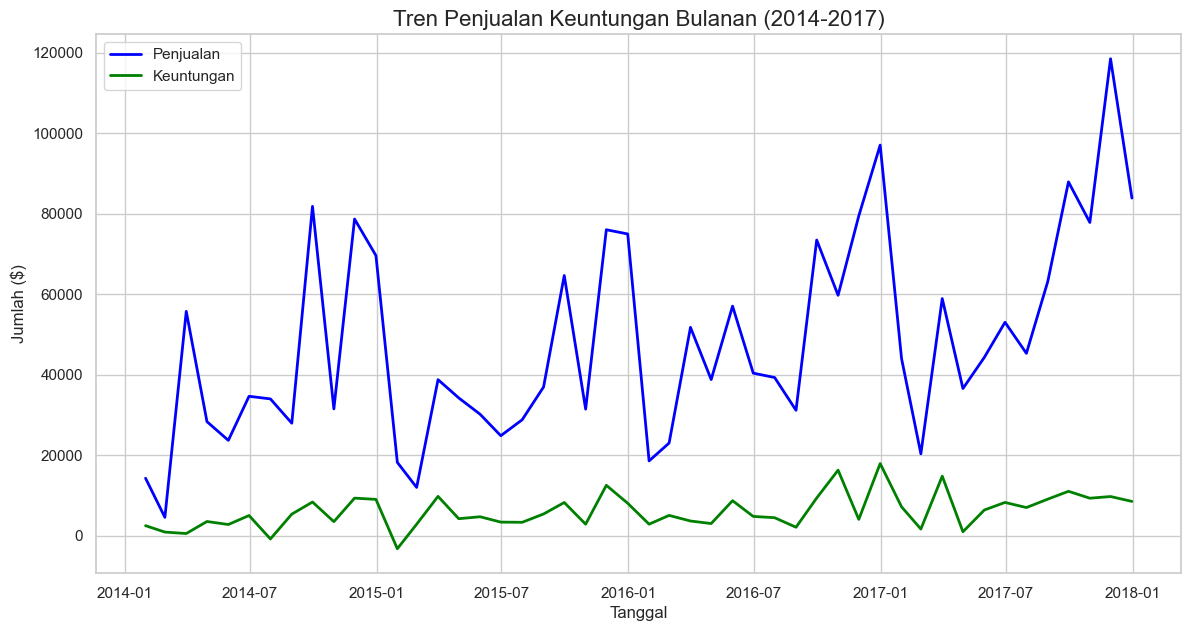

In [25]:
# Mulai EDA
sns.set(style="whitegrid")

# Tren Penjualan dan Keuntungan dari Waktu ke Waktu?
# Resample data perbulan
monthly_sales_profit = df.set_index('Order Date').resample('M').agg({'Sales': 'sum', 'Profit': 'sum'})

plt.figure(figsize=(14,7))
plt.plot(monthly_sales_profit.index, 'Sales', data=monthly_sales_profit, label='Penjualan', color='blue', linewidth=2)
plt.plot(monthly_sales_profit.index, 'Profit', data=monthly_sales_profit, label='Keuntungan', color='green', linewidth=2)
plt.title('Tren Penjualan Keuntungan Bulanan (2014-2017)', fontsize=16)
plt.xlabel('Tanggal', fontsize=12)
plt.ylabel('Jumlah ($)', fontsize=12)
plt.legend()
plt.show()

                       Sales       Profit
Category                                 
Technology       836154.0330  145454.9481
Furniture        741999.7953   18451.2728
Office Supplies  719047.0320  122490.8008


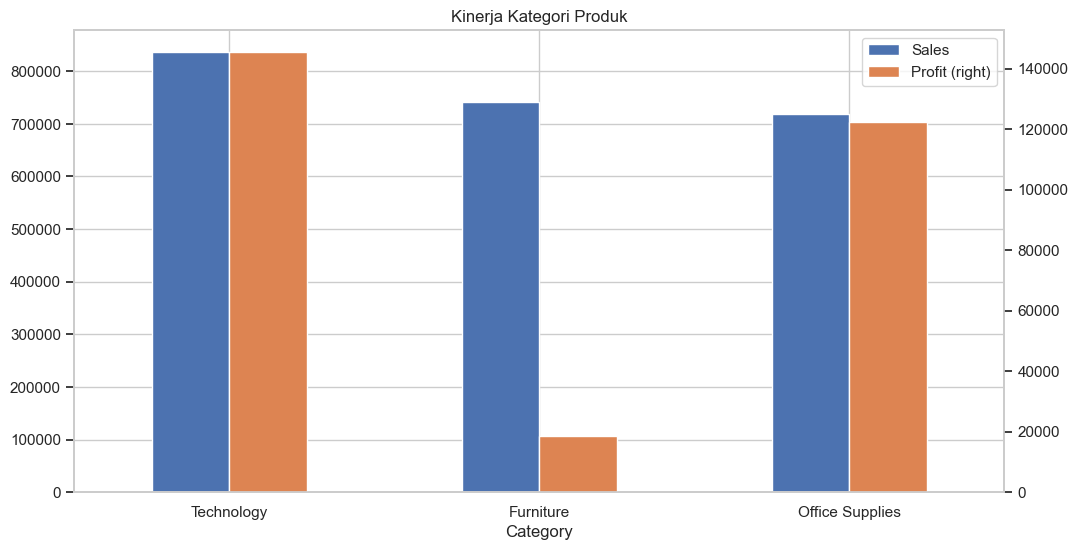

In [31]:
# Kategori dan Sub-Kategori mana yang paling perform?

#Kinerja berdasarkan kategori
category_performance = df.groupby('Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(category_performance)
category_performance.plot(kind='bar', y=['Sales', 'Profit'], figsize=(12,6), secondary_y='Profit', rot=0)
plt.title('Kinerja Kategori Produk')
plt.show()

                    Sales      Profit
Sub-Category                         
Phones        330007.0540  44515.7306
Chairs        328449.1030  26590.1663
Storage       223843.6080  21278.8264
Tables        206965.5320 -17725.4811
Binders       203412.7330  30221.7633
Machines      189238.6310   3384.7569
Accessories   167380.3180  41936.6357
Copiers       149528.0300  55617.8249
Bookcases     114879.9963  -3472.5560
Appliances    107532.1610  18138.0054


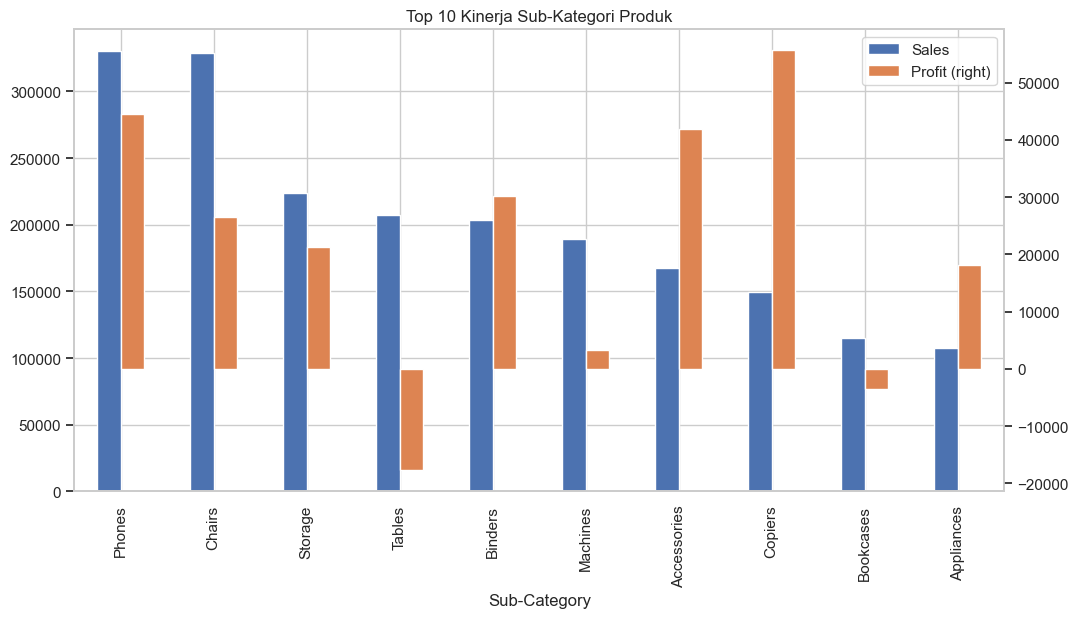

In [30]:
# Kinerja berdasarkan Sub-Kategori (Top 10 Penjualan)
subcategory_performance = df.groupby('Sub-Category')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False).head(10)
print(subcategory_performance)
subcategory_performance.plot(kind='bar', y=['Sales', 'Profit'], figsize=(12,6), secondary_y='Profit')
plt.title('Top 10 Kinerja Sub-Kategori Produk')
plt.show()

               Sales       Profit
Region                           
West     725457.8245  108418.4489
East     678781.2400   91522.7800
Central  501239.8908   39706.3625
South    391721.9050   46749.4303


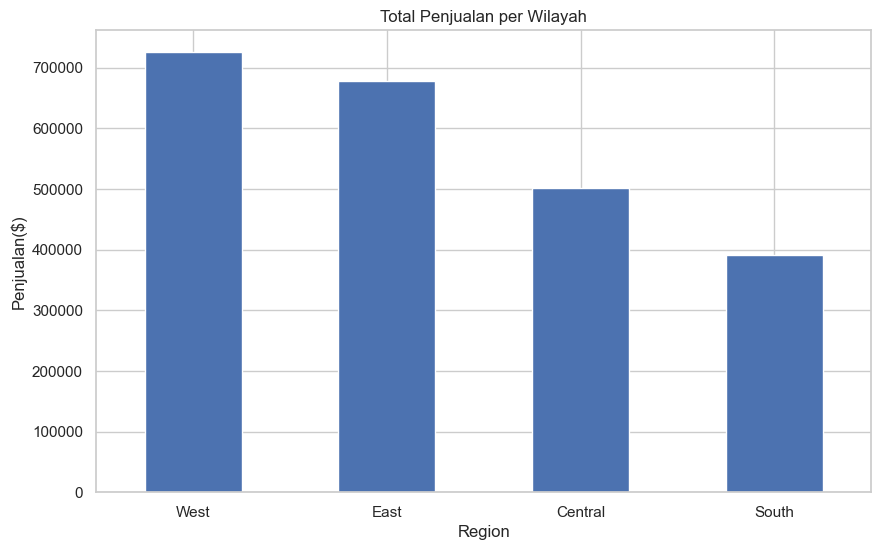

In [32]:
# Wilayah dan segmen pelanggan mana yang paling berkontribusi?

# Kinerja berdasarkan Wilayah (Region)
region_performance = df.groupby('Region')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(region_performance)
region_performance.plot(kind='bar', y='Sales', figsize=(10,6), rot=0, legend=False)
plt.title('Total Penjualan per Wilayah')
plt.ylabel('Penjualan($)')
plt.show()

In [34]:
#10 negara bagian teratas berdasarkan penjualan dan keuntungan
top_10_states_sales = df.groupby('State')['Sales'].sum().sort_values(ascending=False).head(10)
top_10_states_profit = df.groupby('State')['Profit'].sum().sort_values(ascending=False).head(10)
print(top_10_states_sales)
print(top_10_states_profit)

State
California      457687.6315
New York        310876.2710
Texas           170188.0458
Washington      138641.2700
Pennsylvania    116511.9140
Florida          89473.7080
Illinois         80166.1010
Ohio             78258.1360
Michigan         76269.6140
Virginia         70636.7200
Name: Sales, dtype: float64
State
California    76381.3871
New York      74038.5486
Washington    33402.6517
Michigan      24463.1876
Virginia      18597.9504
Indiana       18382.9363
Georgia       16250.0433
Kentucky      11199.6966
Minnesota     10823.1874
Delaware       9977.3748
Name: Profit, dtype: float64


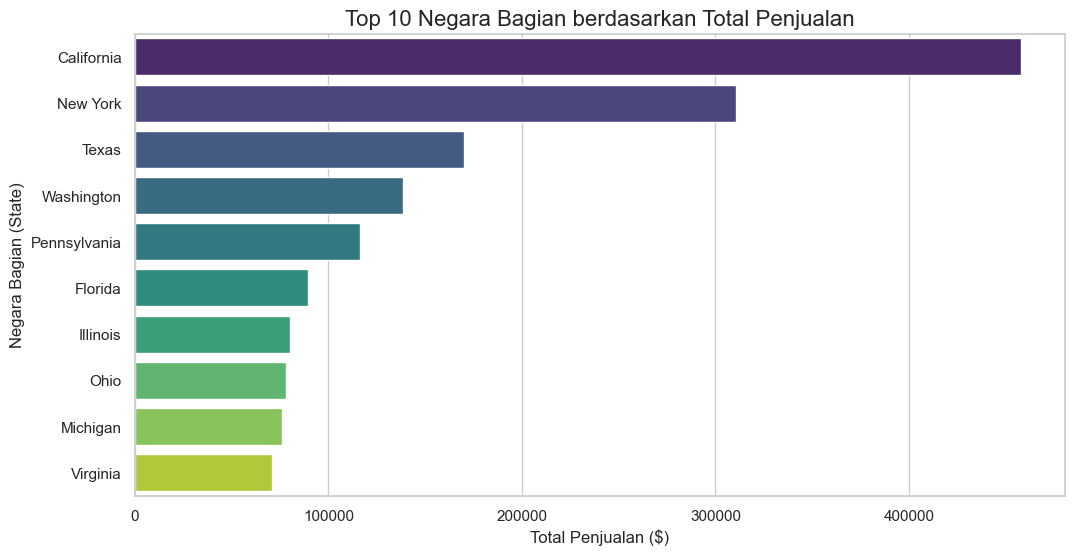

In [37]:
# Visualisasi 10 Negara Bagian berdasarkan Total Penjualan
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_states_sales.values, y=top_10_states_sales.index, palette='viridis')
plt.title('Top 10 Negara Bagian berdasarkan Total Penjualan', fontsize=16)
plt.xlabel('Total Penjualan ($)', fontsize=12)
plt.ylabel('Negara Bagian (State)', fontsize=12)
plt.show()

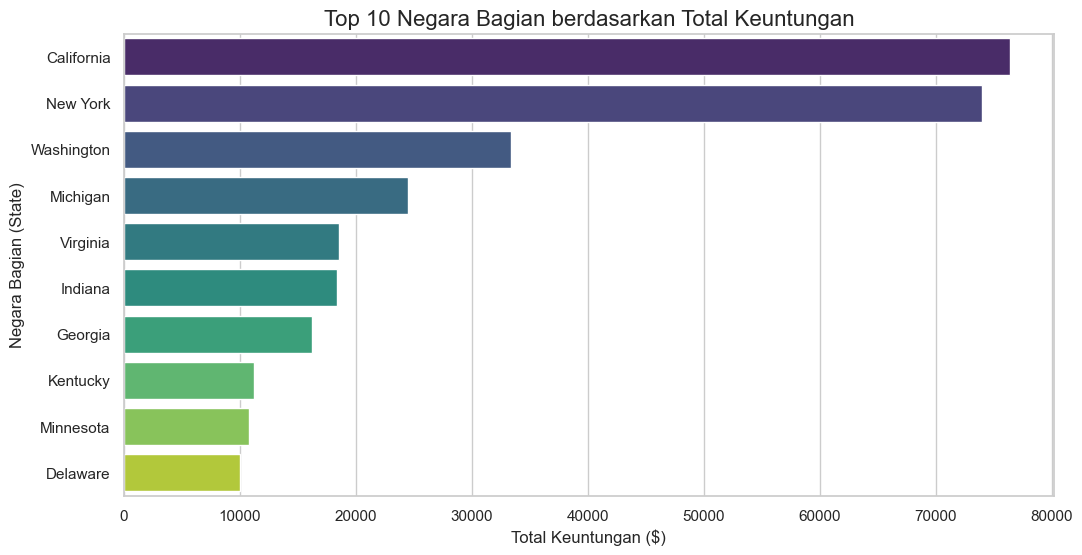

In [38]:
# Visualisasi 10 Negara Bagian berdasarkan Total Keuntungan
plt.figure(figsize=(12,6))
sns.barplot(x=top_10_states_profit.values, y=top_10_states_profit.index, palette='viridis')
plt.title('Top 10 Negara Bagian berdasarkan Total Keuntungan', fontsize=16)
plt.xlabel('Total Keuntungan ($)', fontsize=12)
plt.ylabel('Negara Bagian (State)', fontsize=12)
plt.show()

                    Sales       Profit
Segment                               
Consumer     1.161401e+06  134119.2092
Corporate    7.061464e+05   91979.1340
Home Office  4.296531e+05   60298.6785


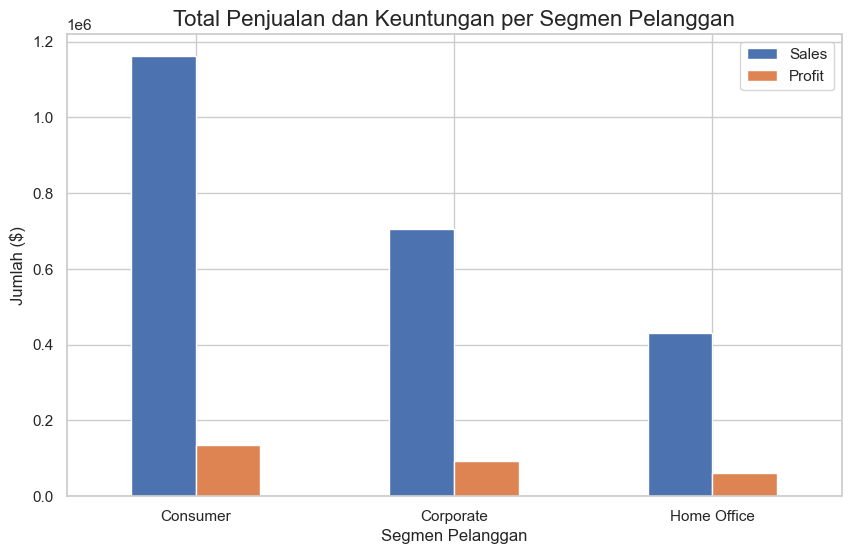

In [41]:
# Analisis berdasarkan Segmen Pelanggan
segment_analysis = df.groupby('Segment')[['Sales', 'Profit']].sum().sort_values(by='Sales', ascending=False)
print(segment_analysis)

# Visualisasi Performa Segmen
segment_analysis.plot(kind='bar', figsize=(10, 6), rot=0)
plt.title('Total Penjualan dan Keuntungan per Segmen Pelanggan', fontsize=16)
plt.xlabel('Segmen Pelanggan', fontsize=12)
plt.ylabel('Jumlah ($)', fontsize=12)
plt.show()


Jumlah Pesanan per Segmen:
Consumer       5191
Corporate      3020
Home Office    1783
Name: Segment, dtype: int64


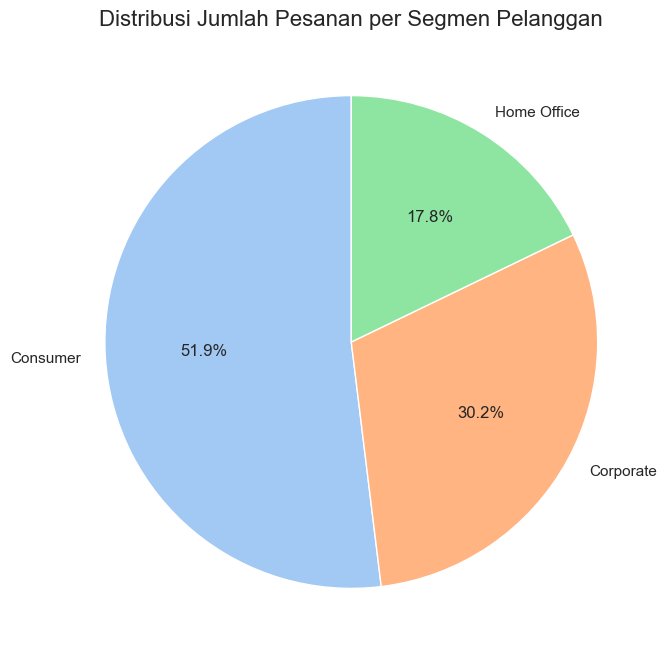

In [42]:
# Analisis jumlah pesanan per segmen
segment_orders = df['Segment'].value_counts()
print("\nJumlah Pesanan per Segmen:")
print(segment_orders)

plt.figure(figsize=(8, 8))
plt.pie(segment_orders, labels=segment_orders.index, autopct='%1.1f%%', startangle=90, colors=sns.color_palette('pastel'))
plt.title('Distribusi Jumlah Pesanan per Segmen Pelanggan', fontsize=16)
plt.ylabel('') # Menghilangkan label 'Segment' dari sumbu y
plt.show()

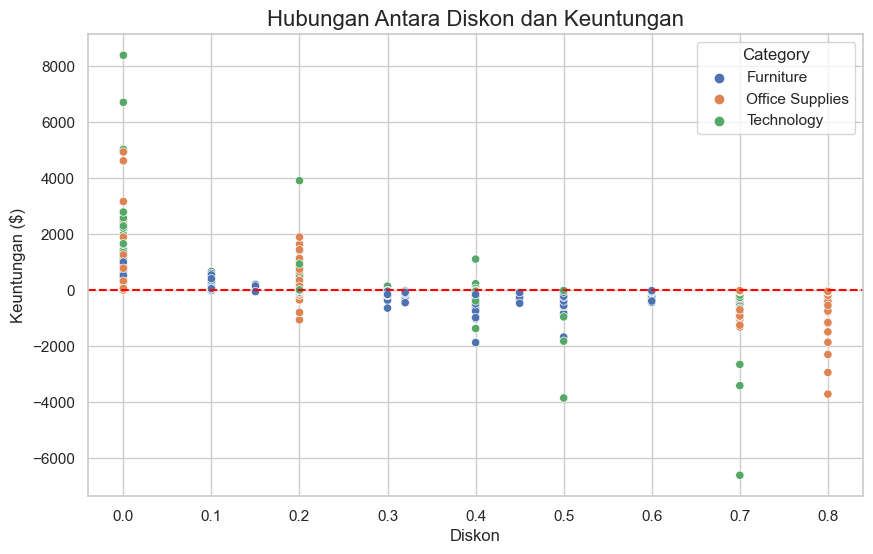

In [45]:
# Bagaimana pengaruh diskon terhadap keuntungan?
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Discount', y='Profit', hue='Category')
plt.title('Hubungan Antara Diskon dan Keuntungan', fontsize=16)
plt.xlabel('Diskon', fontsize=12)
plt.ylabel('Keuntungan ($)', fontsize=12)
plt.axhline(0, color='red', linestyle='--') # Garis batas keuntungan/kerugian
plt.show()